# **Project Name** : NETFLIX MOVIES AND TV SHOWS CLUSTERING

### **Project Summary** :

This project focuses on analyzing and clustering Netflix’s catalog of movies and TV shows using unsupervised machine learning techniques. The dataset is all about Netflix content available up to 2019, including details such as type, title, genre, country, cast, and release year.Our goal is to reveal interesting insights and patterns that can help with business growth and decision-making. By examining trends in content distribution and audience preferences, this project aims to offer useful findings that show how Netflix's catalog has changed and how these insights can be used for future growth.

Over the past decade, Netflix’s content strategy has changed a lot. The number of TV shows has nearly tripled since 2010, while the number of movies has dropped by more than 2,000 titles. This change shows that Netflix is focusing more on serialized content to keep viewers interested. The goal of this project is to find meaningful patterns, clusters, and insights from the dataset that can help guide future strategies and predictions.



> Main Aim of the Project is To find the insights that are helpull in future predictions

#### **Key Steps**

- **Data Preprocessing:** Removing missing and noisy records from the raw data and converting it into meaningful, machine-ready information.  

- **Data Visualization:** After cleaning the data, representing it using different visualization techniques to identify patterns and trends.  


 **Insights** : 
        -

#### **Key Objectives**:

- Exploratory Data Analysis (EDA): Analyze the overall distribution of content using attributes such as type (Movie/TV Show), release year, rating, duration, and listed in (genre/category).

- Content Trend Analysis: Identify how Netflix’s focus has changed over time by studying the release year, type, and date added fields.

- Clustering Content: Apply clustering techniques to group similar content based on text-based features, such as genre, description, and cast.

- Viewer-Oriented Insights: Use the rating and duration columns to understand audience targeting. For example, this includes family-friendly shows, adult content, or binge-worthy series.

- Future Trend Prediction: Use time-based attributes, such as date added and release year, to forecast how Netflix might expand its focus on specific content types, genres, or regions.

### **Problem Statement**
This Dataset is created on Netflix to Analyze and Extract Valuable information such as : 
- **Trend Analysis** :The number of TV shows has nearly tripled since 2010, while the number of movies has dropped by more than 2,000 titles.Netflix Focused on Tv shows over the Movies

- **Country Wise** :The Netflix dataset  shows uneven content distribution across countries. Analyzing country-wise data can reveal regional preferences, dominant genres, and help identify opportunities for future expansion.

- **Ratings** : Analyzing ratings can help understand audience targeting, age restrictions, and viewing preferences.


#                                                     **Data Preprocessing**

##### Importing Librabries

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


##### Loading Dataset

In [129]:
data=pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv") # Loading the Netflix dataset

##### Showing First 5 Rows

In [130]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##### Number of records and attributes

In [131]:
data.shape

(7787, 12)

##### Number of Duplicated rows

In [132]:
data.duplicated().sum()

np.int64(0)

##### Column names in the Dataset

In [133]:
data.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

#### Dataset Features  

- show_id : Unique identifier for each record.  

- type : Specifies whether the content is a *Movie* or a *TV Show*. 
 
- title : Name of the Movie or TV Show.  
- director : Name of the director.  
- cast : Names of the actors involved.  
- country : Country where the content was released.  
- date_added : Date when the content was added to Netflix.  
- release_year : Year the content was originally released.  
- rating : Audience suitability rating (e.g., TV-MA, PG, R).  
- duration : Runtime of the movie (in minutes) or number of seasons for a TV show.  
- listed_in : Genre or category of the content.  
- description : Brief summary or overview of the content.  


##### Information about Dataset

In [134]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 7.0 MB


##### Removing Unwanted Attributes

In [135]:
data =data.drop(['show_id','title','description'],axis=1)# Dropping unique identifier column as it has no analytical value

##### Converting Into Numeric datatype

In [136]:
data['release_year']=data['release_year'].astype('Int16')

- Converted release_year to 'Int16' for memory efficiency

##### Converting Into datatime datatype

In [137]:
# Strip leading/trailing spaces and convert to datetime
# Clean and convert 'date_added' to datetime format (date only)
data['date_added'] = pd.to_datetime(data['date_added'].str.strip(), errors='coerce').dt.floor('D')

##### Converting Appropriate Attributes into Categorical

In [138]:
# based on the data values changing into Categorical because categorical will take less memory space

data['type']=data['type'].astype('category')
data['country']=data['country'].astype('category')
data['rating']=data['rating'].astype('category')  #“Converting string columns with limited unique values into categorical types to save memory.”

##### Altering Mixed Datatype values

In [139]:
# # For movies: runtime in minutes
data['runtime_minutes'] = data.loc[data['type']=='Movie', 'duration'].str.extract(r'(\d+)').astype('Int16')

# # For TV shows: number of seasons
data['num_seasons'] = data.loc[data['type']=='TV Show', 'duration'].str.extract(r'(\d+)').astype('Int8')

data['runtime_minutes']=data['runtime_minutes'].fillna(data['runtime_minutes'].median())
data['num_seasons']=data['num_seasons'].fillna(data['num_seasons'].median())

##### Removing Duration Feature

In [140]:
data.drop('duration',axis=1,inplace=True)

“Dropping the original duration column since we have separated values into two new columns.”

##### Collection of Caetegorical Features

In [141]:
data_category=data[['type', 'country','rating', 'listed_in']]

In [142]:
data_category.describe()

,type,country,rating,listed_in
count,7787,7280,7780,7787
unique,2,681,14,492
top,Movie,United States,TV-MA,Documentaries
freq,5377,2555,2863,334


##### Null/Missing Values Count

type                  0
director           2389
cast                718
country             507
date_added           10
release_year          0
rating                7
listed_in             0
runtime_minutes       0
num_seasons           0
dtype: int64


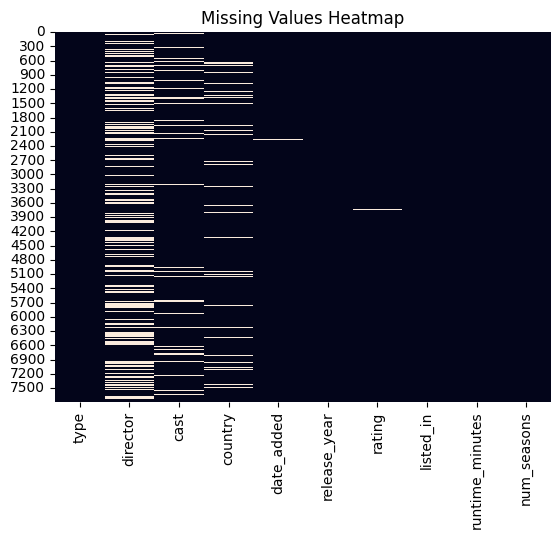

In [143]:
print(data.isnull().sum())
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


##### Removing Director Column

In [144]:
data=data.drop('director',axis=1) #axis= ==> 1 For entire column | 0 for specific row

##### Removing records with less Missing values

In [145]:
data.dropna(subset=['rating','date_added'],inplace=True)

##### Replacing Missing Values with Centraltendency

In [146]:
data['country']=data['country'].fillna(data['country'].mode()[0])


##### Filling  Missing/Unknown values

In [147]:
data['cast']=data['cast'].fillna('Missing')

##### Prepared Dataset With 0 null values

In [148]:
data.isnull().sum()

type               0
cast               0
country            0
date_added         0
release_year       0
rating             0
listed_in          0
runtime_minutes    0
num_seasons        0
dtype: int64

##### Memory Efficiency

In [149]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   type             7770 non-null   category      
 1   cast             7770 non-null   object        
 2   country          7770 non-null   category      
 3   date_added       7770 non-null   datetime64[ns]
 4   release_year     7770 non-null   Int16         
 5   rating           7770 non-null   category      
 6   listed_in        7770 non-null   object        
 7   runtime_minutes  7770 non-null   Int16         
 8   num_seasons      7770 non-null   Int8          
dtypes: Int16(2), Int8(1), category(3), datetime64[ns](1), object(2)
memory usage: 2.1 MB


- we removed around 4.9 MB which is unwanted ,Also improving the Memory Efficiency

All about above process : 

- Removing of show_id Attribute,Because show_id can't be effective for further analysis
- 'duration' column contains data values two different types ,so we perform splitting into Two different columns
- Converting Attributes as per their data values
- Removing/Filling the Missing values

# **Data Visualization**

### ***Univariate Analysis***

- Analysis Done on Single Attribute

#### Comparison between Total number of Movies and Tv Shows

type
Movie      5372
TV Show    2398
Name: count, dtype: int64


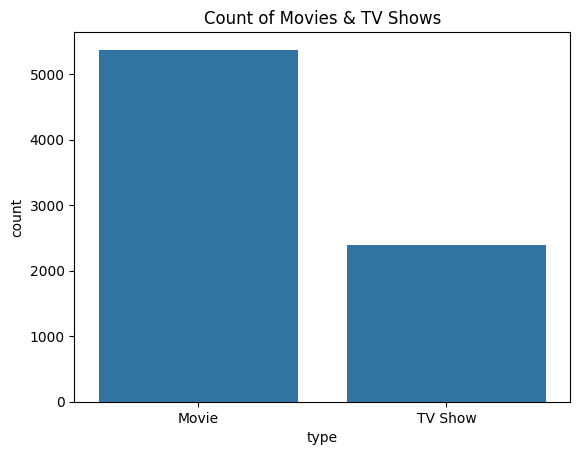

In [150]:
print(data['type'].value_counts())
sns.countplot(data=data,x='type')
plt.title('Count of Movies & TV Shows')
plt.show()

- Insights :
number of movies are twice greater than  Tv shows

#### Countries which produces High number of Movies

country
United States     3051
India              923
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: count, dtype: int64


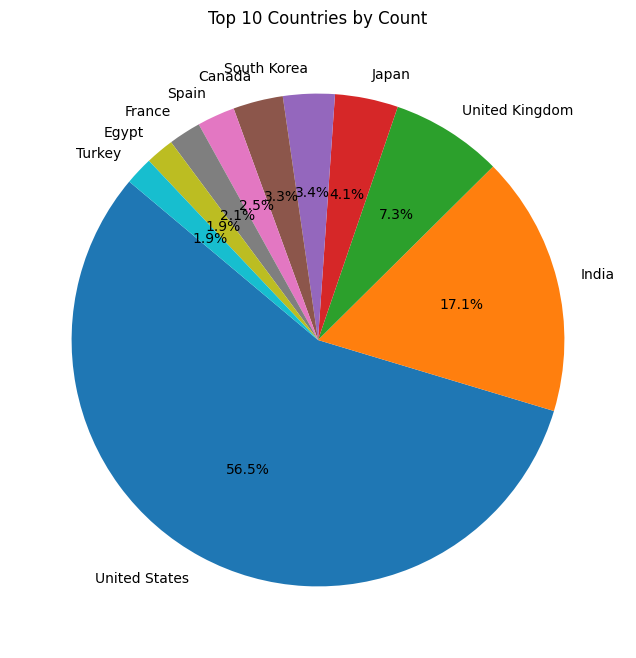

In [151]:
# Top 10 countries
top_country = data['country'].value_counts()[:10]
print(top_country)
# Pie chart
plt.figure(figsize=(8,8))
plt.pie(top_country, labels=top_country.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Countries by Count")
plt.show()

- Insights : More than 50% of movies/Tv Shows are produced by USA

#### Years Which Movies Releases in Netflix 

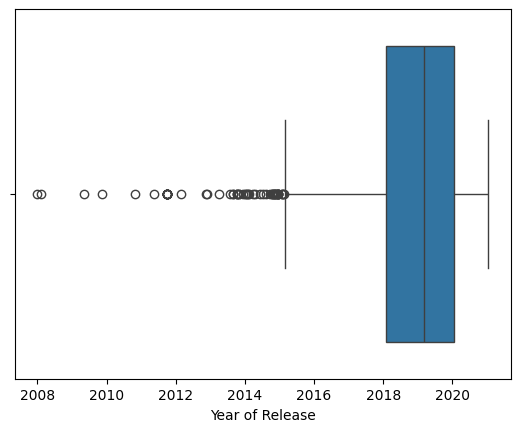

In [152]:
sns.boxplot(data=data,x='date_added')
plt.xlabel('Year of Release')
plt.show()

- insights : From 2018 Movies/Tv shows become famous in Netflix

#### Movies & Tv Shows Produced by year wise

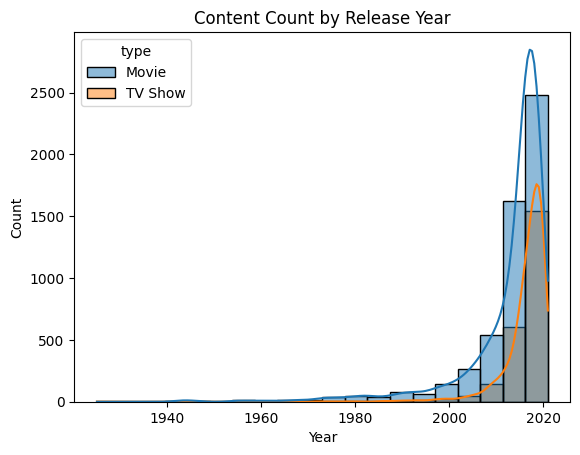

In [153]:

sns.histplot(data=data, x='release_year',hue='type',kde=True,bins=20)
plt.xlabel('Year') 
plt.title("Content Count by Release Year")
plt.show()

- Insights :By the help of above Graph we can expect in Future years count of movies and Tv shows will  increases

#### Taking the First Genre From the Listed of Genres

In [154]:
data['First_Genre']=data['listed_in'].str.split(',').str[0]
data=data.drop('listed_in',axis=1)


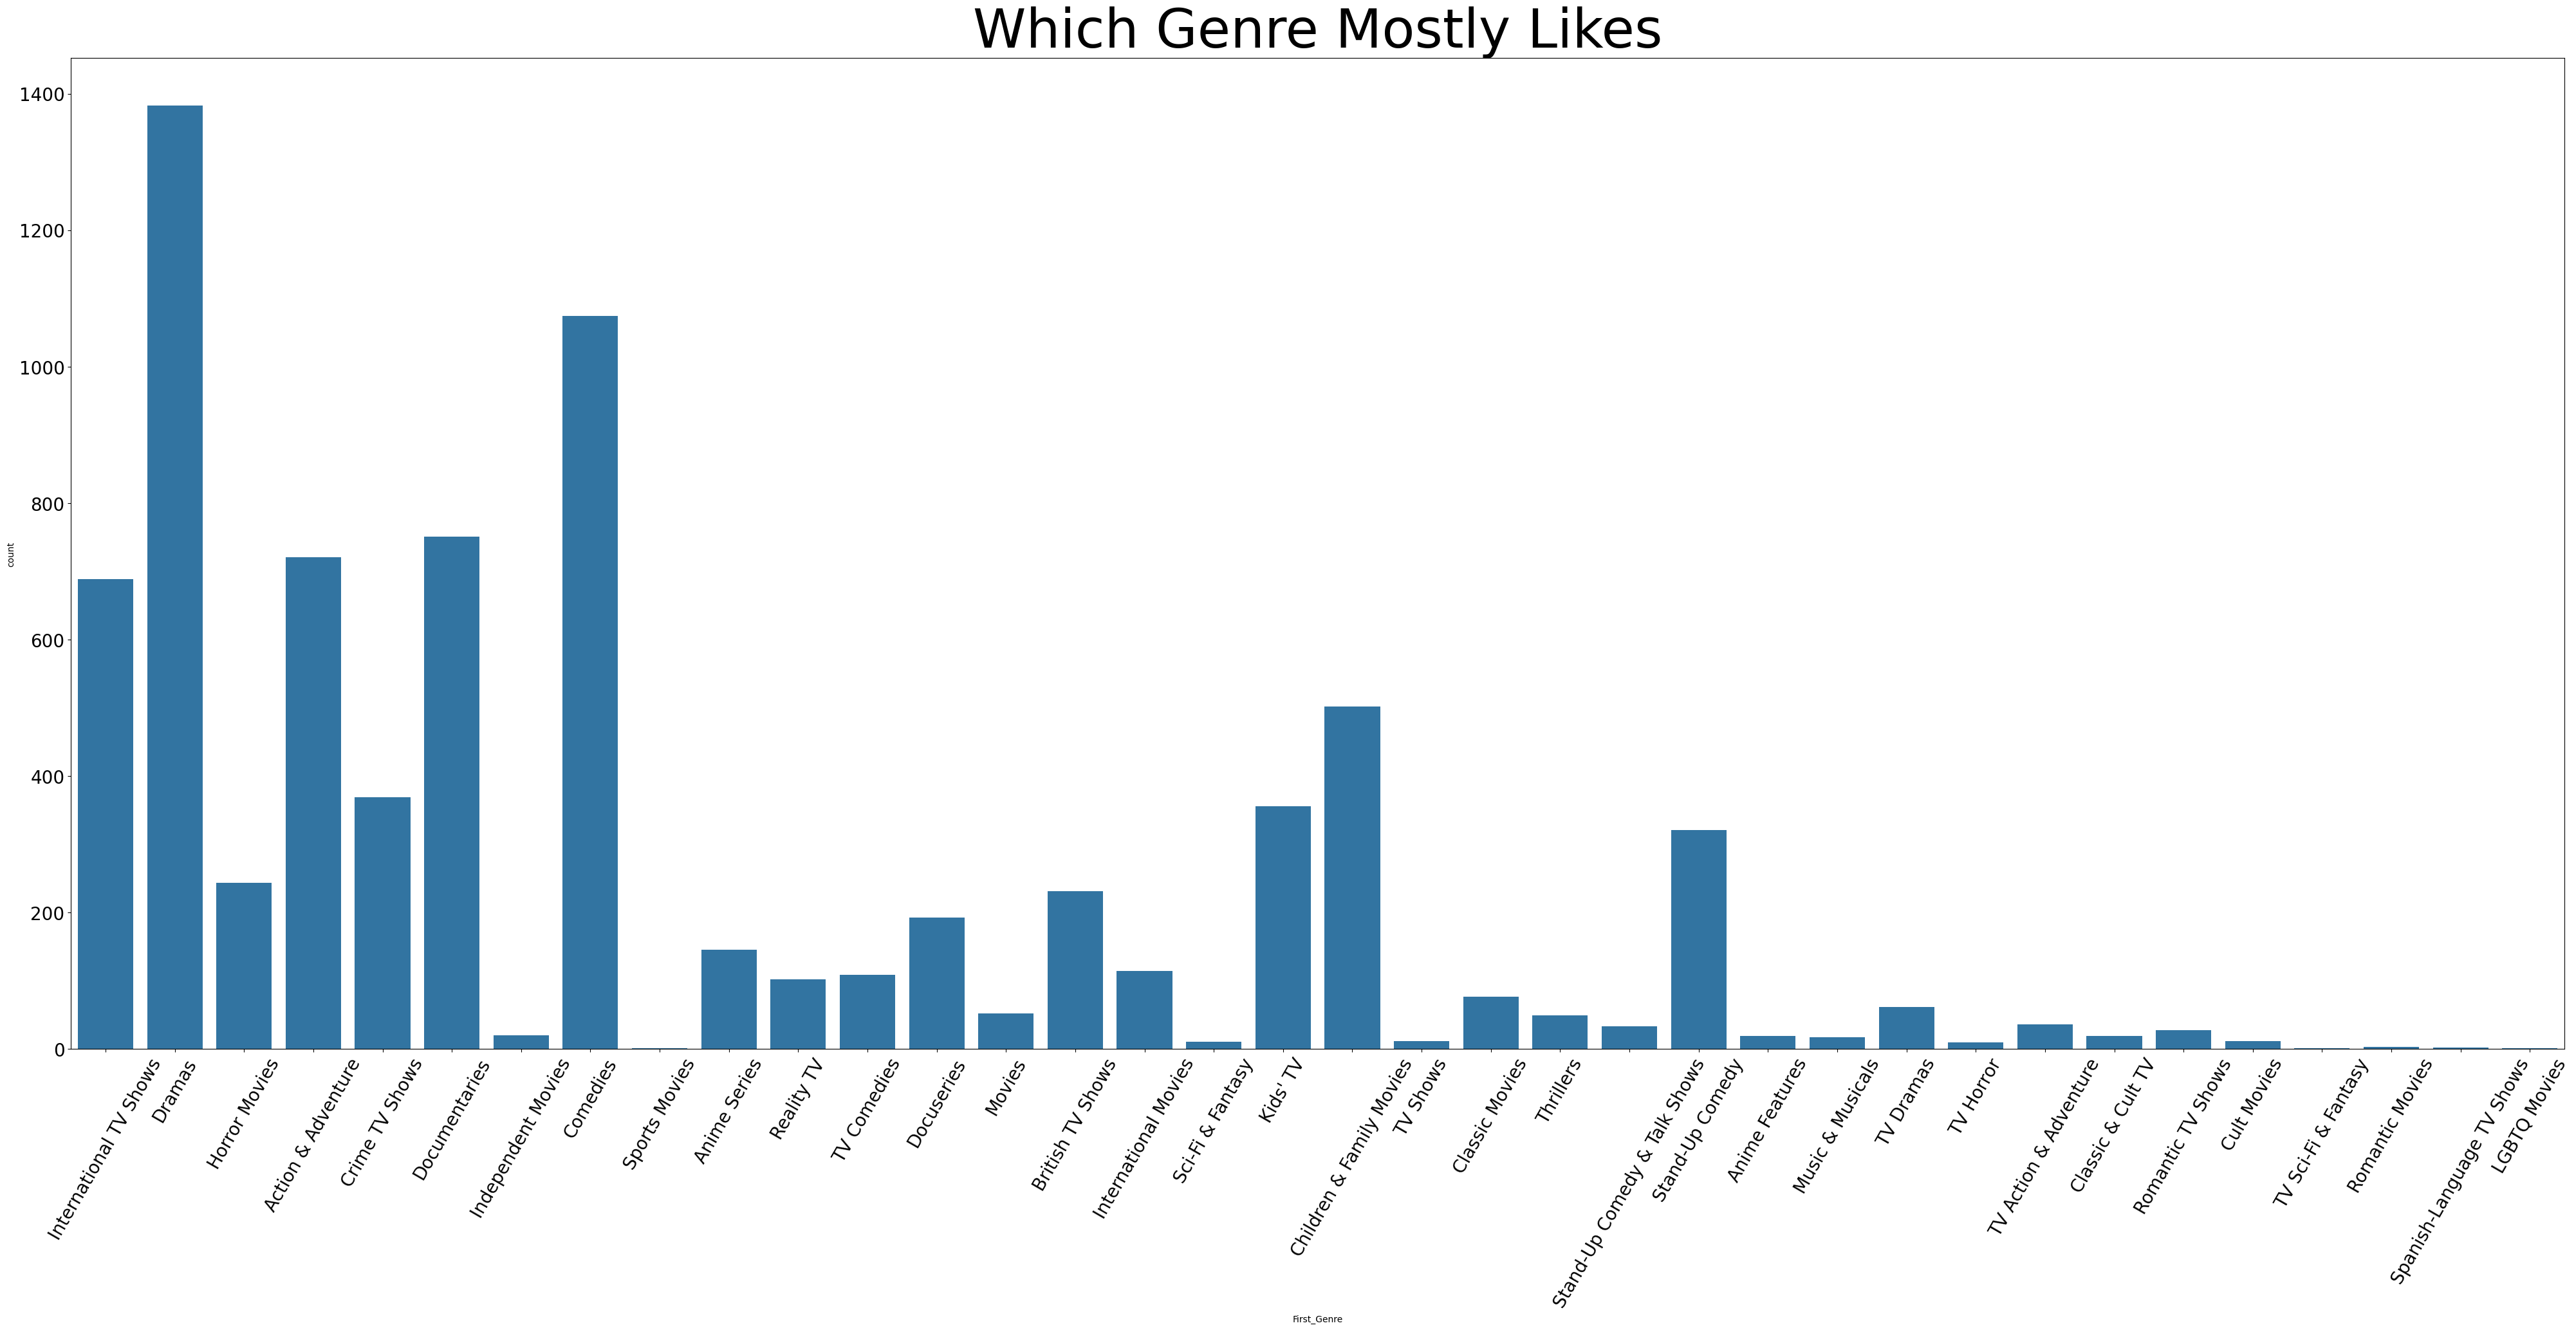

In [155]:
plt.figure(figsize=(50,20))
sns.countplot(data=data,x='First_Genre')
plt.title("Which Genre Mostly Likes",fontsize=60)
plt.xticks(rotation=60,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

- Insights : Mostly People Likes to watch Dramas,Comedies and Documentaries

#### Average Runtime of the Movie

<Axes: xlabel='runtime_minutes'>

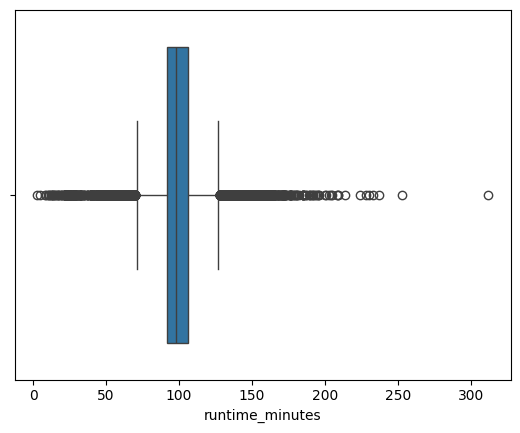

In [156]:
sns.boxplot(data=data,x='runtime_minutes')

- Insights:
            The Average Movie time is around 90-110 min 

#### Average Number of Seasons

<Axes: xlabel='num_seasons'>

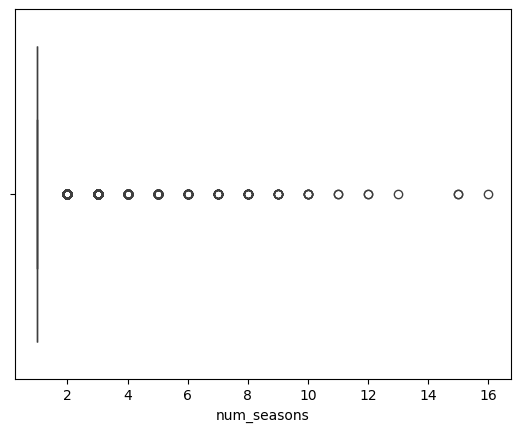

In [157]:
sns.boxplot(data=data,x='num_seasons')

- Insights : Mostly The seasons are between 1 and 2

#### Which Type of Movies or Tv Shows People Mostly Prefer to watch

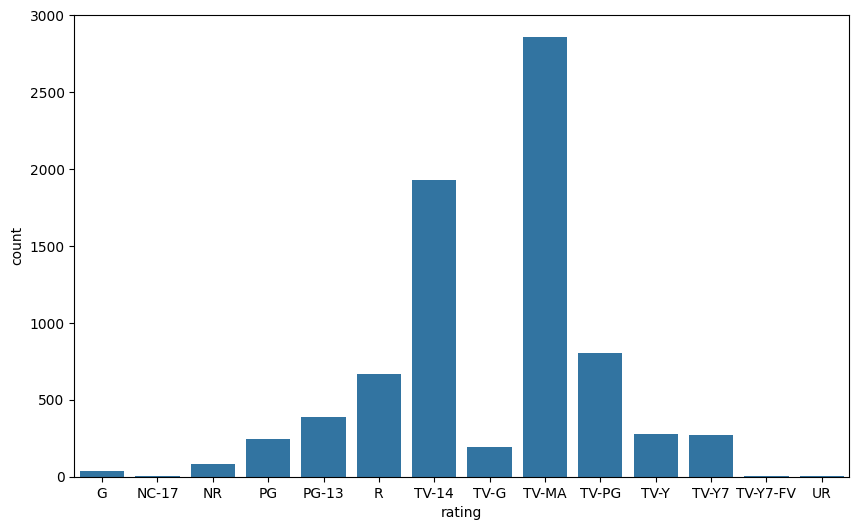

In [158]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='rating')
plt.show()

- Insigths : Mostly TV-MA(Mature Audience only (Adults, 17+)) rating Movies/Tv Shows are Most 

###  ***Bivariate Analysis***

- Analysis Done on Two Attributes

#### Which Country Produces Most of Movies/Tv Shows

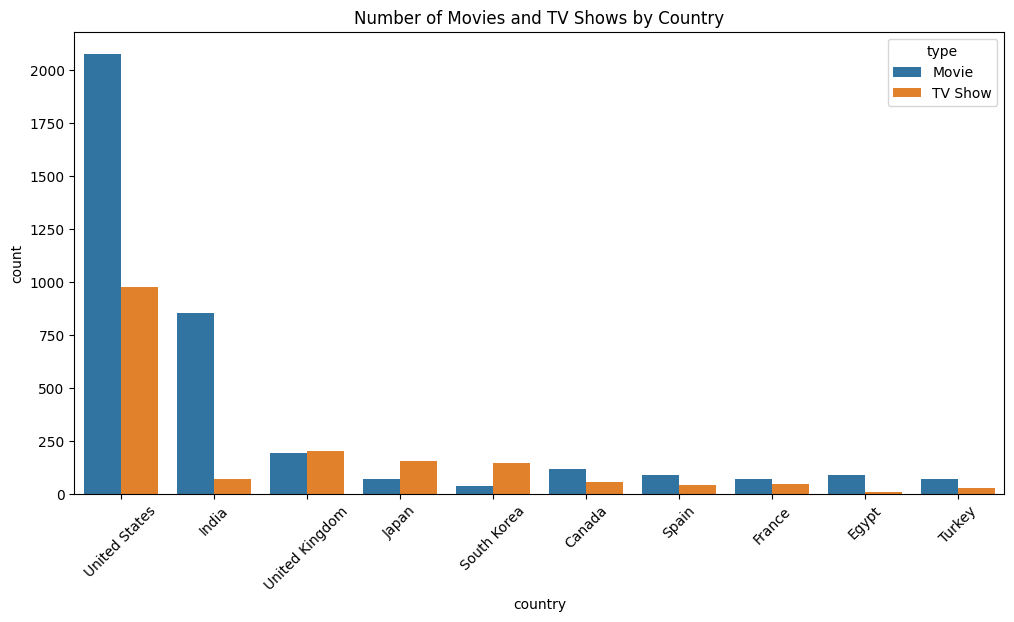

In [159]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='country', hue='type', order=data['country'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)
plt.title("Number of Movies and TV Shows by Country")
plt.show()


- Insights :
- In Both Movies/Tv shows are Produced Maximum by USA 
- Least Movies and Tv shows from the South Korea and Egypt Respectively

#### Which Focuses on what kind of Ratings most

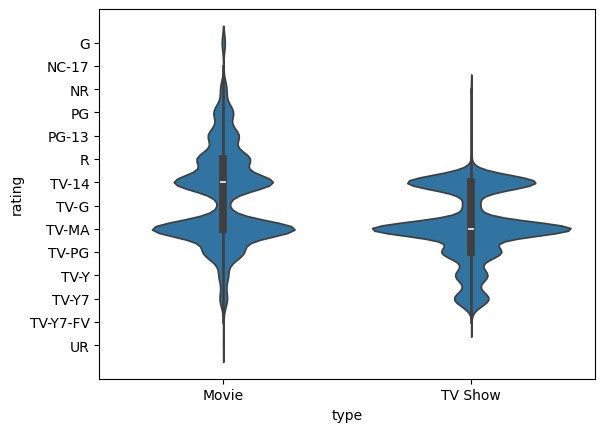

In [160]:
sns.violinplot(data=data,x='type',y='rating')
plt.show()

- Insights: 
- Movies mostly are TV-MA(Adults, 17+) ,TV-14(14+)  and R(Restricted)
- Tv shows are Mostly TV-MA ,TV-PG and TV-Y7

#### How Runtime changes Over the time

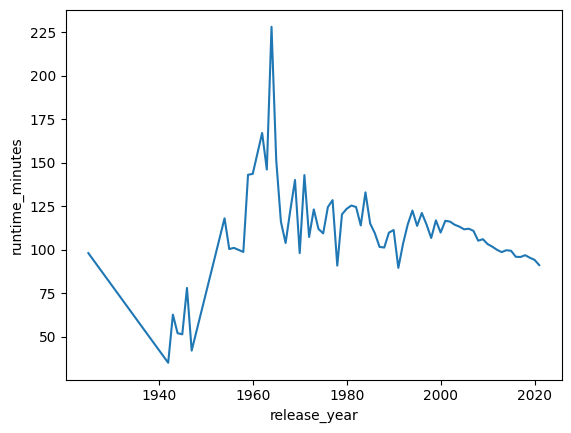

In [161]:
sns.lineplot(data=data,x='release_year',y='runtime_minutes',ci=None,errorbar=None)
plt.show()

- Insights : From the Past Years Duration is Decreased Slightly 
* In Future Duration May be Chance to Decrease or Maintain As 90 min

<Axes: xlabel='release_year', ylabel='num_seasons'>

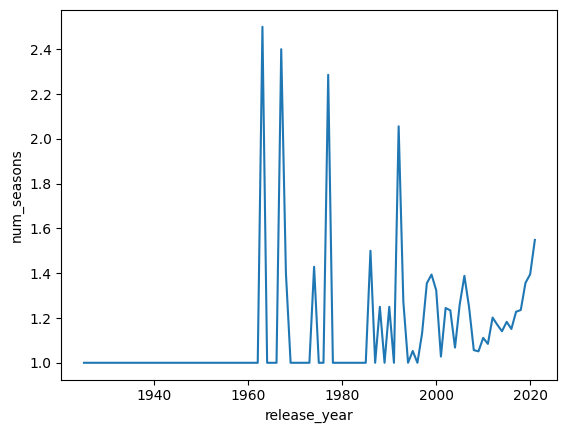

In [162]:
sns.lineplot(data=data,x='release_year',y='num_seasons',ci=None)

- Insights : 
- In Before 2000's Number is seasons is quite Large 
- Between 2000's and 2020's There is slight decrease in Number of seasons
- as observed After 2020's there is a chance to incerease in number of seasons

#### Most Frequently Acted Actors

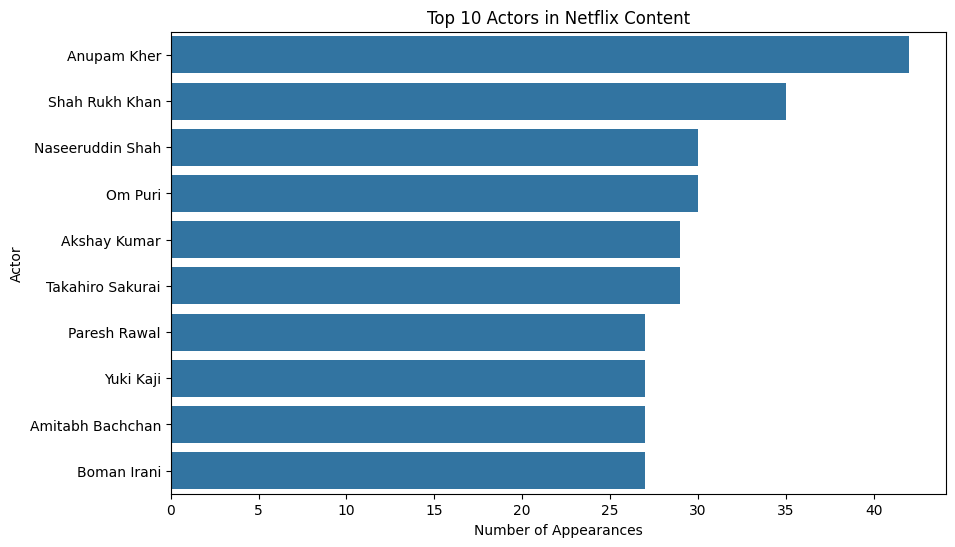

In [163]:
# Split by comma and convert to a single flat list
all_actors = data['cast'].str.split(',').explode().str.strip()
actor_counts = all_actors.value_counts()[1:11]


plt.figure(figsize=(10,6))
sns.barplot(x=actor_counts.values, y=actor_counts.index)
plt.title("Top 10 Actors in Netflix Content")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor")
plt.show()

- Insights :Most Frequently Acted Actors may get High Popularity

#### Runtime Depend on Genres

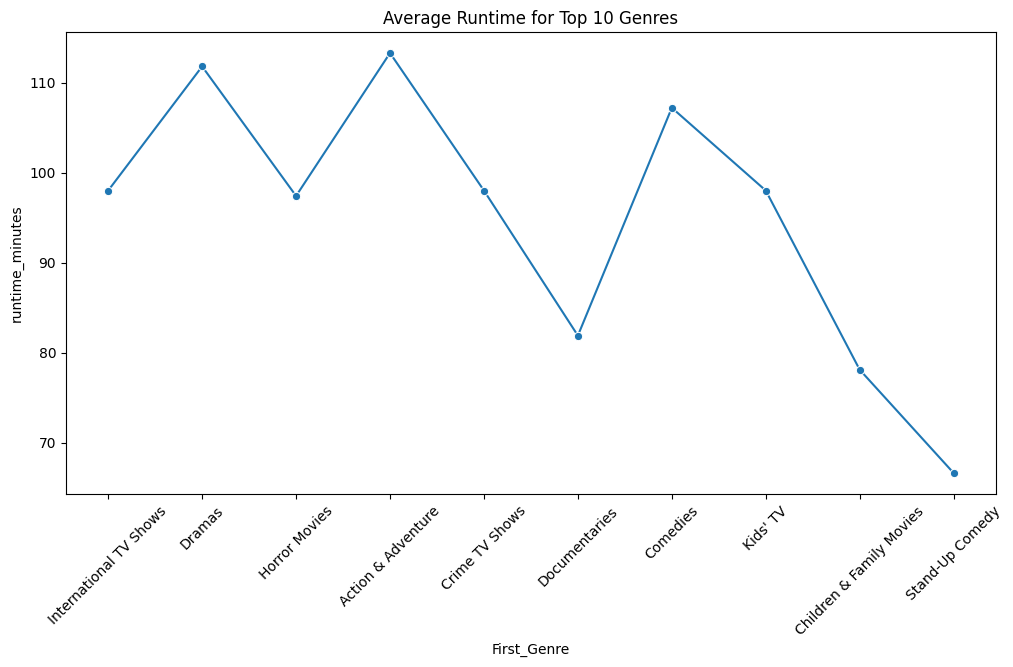

In [164]:
# Step 1: Get top 10 genres
top_genres = data['First_Genre'].value_counts().index[:10]

# Step 2: Filter data for those genres
filtered_data = data[data['First_Genre'].isin(top_genres)]

# Step 3: Create line plot
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_data, x='First_Genre', y='runtime_minutes', ci=None, marker='o')
plt.xticks(rotation=45)
plt.title('Average Runtime for Top 10 Genres')
plt.show()


- Insights : 
- Stand-Up comedy Contains Very Less Runtime
- Dramas and Adventure has High Runtime . This will take more time to Watch entire Movie/Tv shows

#### In Which Year Types Of Categories Introduced

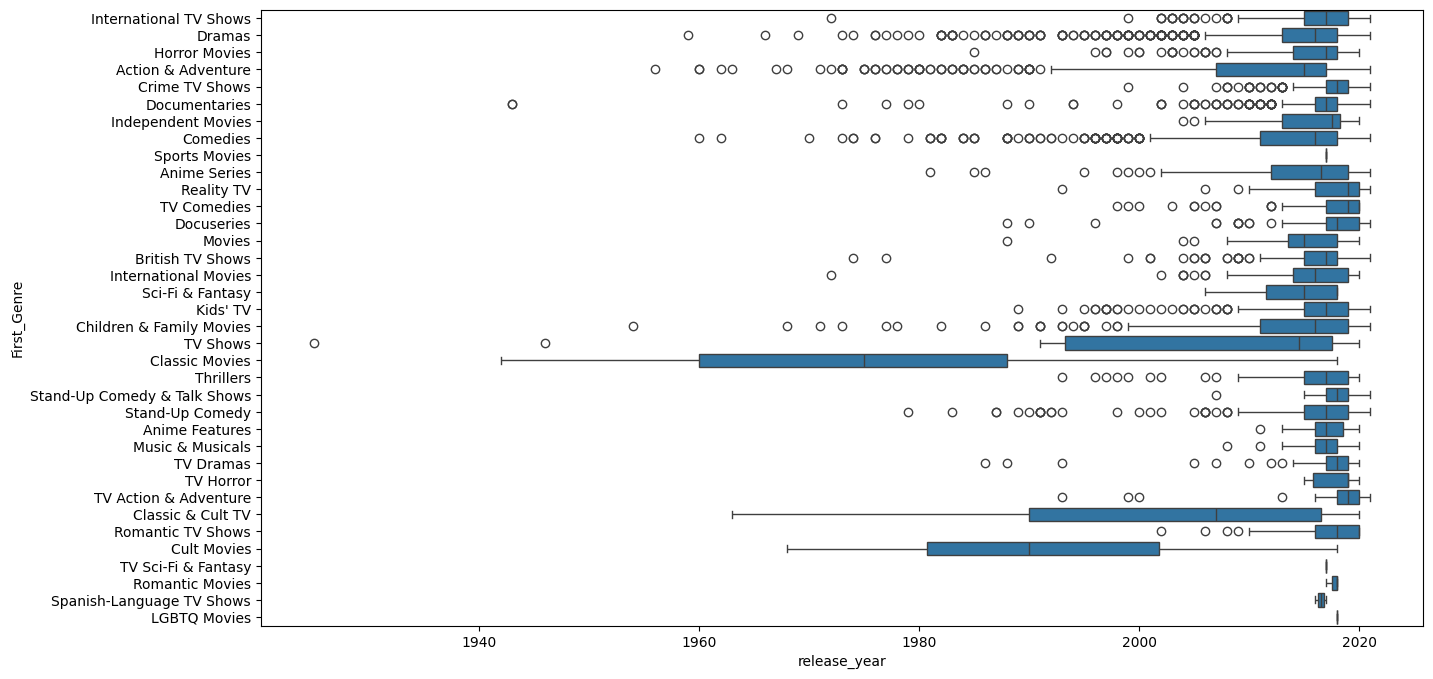

In [165]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='release_year', y='First_Genre')
plt.show()


- Insights: Most of the Categories Are not released Before 2000 .Early 2020 All the Categorical MOvies are comes into place

#### Visualization of All Numerical Columns

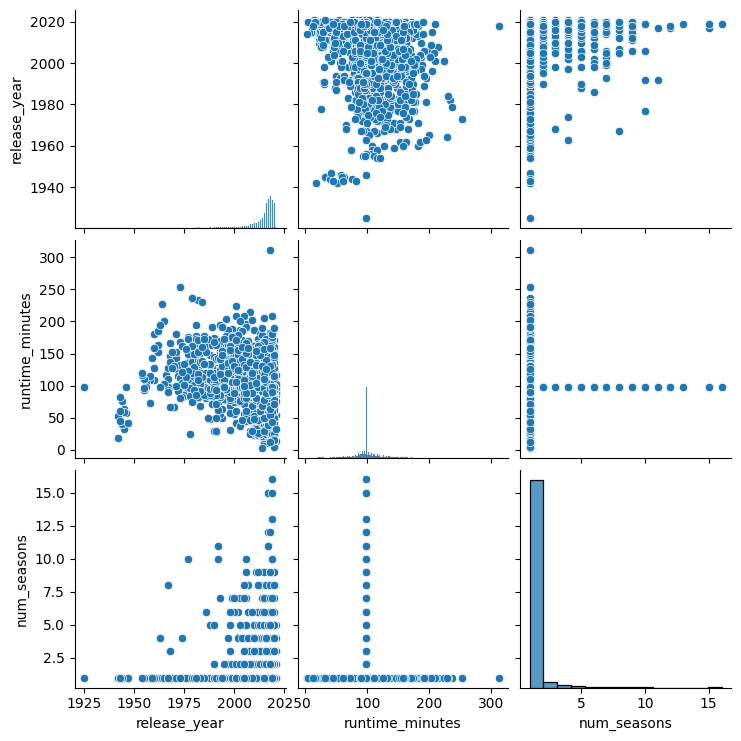

In [166]:
sns.pairplot(data)

In [167]:
num_col = data.select_dtypes(include=['number'])


<Axes: >

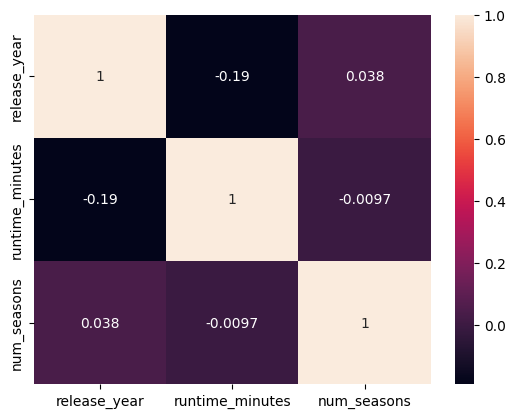

In [168]:
sns.heatmap(num_col.corr(),annot=True)

## **Conclusion** :

The EDA(Exploratory Data Analysis) as Covered all the Insights and Hidden Patterns on Netflix.
 Some of the interesting insights mentioned below

- Most of the Data Present in Netflix is About Movies which is more than Twice as compared with Tv Shows.
>
- The Production of Movies/Tv Shows are Quite Increased in a Huge Amount from the past Years.
>
- USA is being the Top on producing Movies/Tv shows as Compared with Other Countries followed by India,Uk..
>
- As of now all categorical movies were Releasing But there are High Chances to People they Likes to Watch Dramas And Comedy Films.
>
- From the past Years runtime is decreased a quite Large.But Now, They Maintains around 90 minutes Per Film
>
- In Future the Number of films is Quite Increases in Huge Amount. In that Films People is Likely to Watch Dramas and Comedy Genre More

As of we covered Most of the useful insights in the Upcoming Days For the Netflix.